In [38]:
import numpy as np
import pandas as pd
import sympy as sym
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 7.5, 7.5
from PIL import Image

from scipy.stats import skew
from scipy.stats.stats import pearsonr


#Aditya Kharosekar amk3587
#Rahul Jain rj8656

# Question 1
## Part 1 and 2
Consider the linear subspace S = span{v1, v2, v3, v4} where v1 = [1, 2, 3, 4], v2 = [0, 1, 0, 1], v3 =
[1, 4, 3, 6], v4 = [2, 11, 6, 15]. Create a vector inside S different from v1, v2, v3, v4. Create a
vector not in S. How would you check if a new vector is in S?
Find the dimension of the subspace S.

In [3]:
v1 = [1, 2, 3, 4]
v2 = [0, 1, 0, 1]
v3 = [1, 4, 3, 6]
v4 = [2, 11, 6, 15]

vector_inside_S = [0, 0, 0, 0]
for i in range(4):
    vector_inside_S[i] = 2*v1[i]
print("A vector inside S: ", vector_inside_S)

A vector inside S:  [2, 4, 6, 8]


To find the dimension of a subspace, we need to row reduce the matrix formed by taking the vectors as columns. If all rows have atleast 1 non-zero element, it means that the rows are linearly independent and thus, the dimension of the subspace spanned by these vectors will be equal to the dimension of each vector. Generally, the number of non-zero rows equals the dimension of the subspace.

In [4]:
M = sym.Matrix([[1, 2, 3, 4], [0, 1, 0, 1], [1, 4, 3, 6], [2, 11, 6, 15]])
M = M.rref()
print(M[0])

Matrix([[1, 0, 3, 2], [0, 1, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0]])


After row reducing, we see that not all rows contain a non-zero element. In fact, only two rows are non-zero. Therefore, the dimension of the subspace spanned by these vectors is 2. The rank of the matrix is 2.

As these vectors span only a plane in R^4, a vector such as [1, 1, 1, 0] will not be in the span.

A vector is in S if it can be written as a linear combination of the basis vectors of S.

## Part 3
Find an orthonormal basis for the subspace S.

In [5]:
x1 = v1
x2 = v2
x3 = v3
x4 = v4 #this is just for notation's sake. To make it easier for me to follow -
#http://www.math.uconn.edu/~troby/math2210f16/LT/sec6_4.pdf

#I will now use v1 and v2 to talk about basis vectors
v1 = x1
v2 = np.subtract(x2, np.multiply((np.dot(x2, v1) / np.dot(v1, v1)), v1))

norm1 = np.linalg.norm(v1)
norm2 = np.linalg.norm(v2)
v1 = np.divide(v1, norm1)
v2 = np.divide(v2, norm2)
print("Vector v1: ", v1)
print("Vector v2: ", v2)
print("Magnitude of vector v1: ", np.linalg.norm(v1))
print("Magnitude of vector v2: ", np.linalg.norm(v2))
print("Dot product of v1 and v2: ", np.dot(v1, v2))

Vector v1:  [ 0.18257419  0.36514837  0.54772256  0.73029674]
Vector v2:  [-0.2236068   0.67082039 -0.67082039  0.2236068 ]
Magnitude of vector v1:  1.0
Magnitude of vector v2:  1.0
Dot product of v1 and v2:  -1.11022302463e-16


As shown above, vectors v1 and v2 form an orthonormal basis for S

## Part 4
Solve the optimization problem minx∈S||x − z∗||2 where z∗ = [1, 0, 0, 0].

We are trying to find the vector x, in S, which is closest to [1, 0, 0, 0]. Any vector in S can be written as a linear combination of v1 and v2, as these are the two linearly independent vectors which span S. We use the equation for the solution to the general linear regression problem, and the solution to this equation, beta, will be the two constants with which we multiply v1 and v2 to get the vector in S closest to [1, 0, 0, 0].

In [6]:
y = np.matrix('1; 0; 0; 0')
X = np.matrix('1 0; 2 1; 3 0; 4 1')
XT = np.matrix.transpose(X)
A = np.dot(XT, X)
A = np.linalg.inv(A)
B = np.dot(XT, y)
beta = np.dot(A, B)
print(beta)

[[ 0.08333333]
 [-0.25      ]]


As the above solution shows, the vector closest to [1, 0, 0, 0] in S is the vector - 
0.083v1 - 0.25v2, where v1 is the column vector [1, 2, 3, 4] and v2 is the column vector [0, 1, 0, 1].

That is, the vector [-0.083, -0.416, -0.249, -0.582].

# Question 2
## Part 1
Generate 20 random points in d = 3, from a Gaussian multivariate distribution with mean
[0, 0, 0] and covariance matrix ( 0.5 0 0,
0 0.5 0,
0 0 0.7
). Let’s call this data with label 1. Also generate 20
random points in d = 3 from another Gaussian with mean [1, 1, 1] and covariance ( 0.5 0 0,
0 0.5 0,
0 0 0.01
).
Let’s call that data with label 2. Create a three dimensional plot of the clouds of data points,
labeled with the two labels.

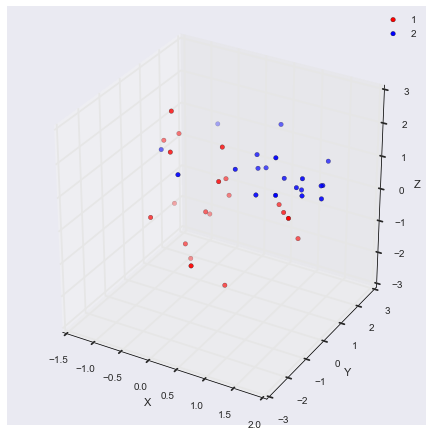

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

mean1 = [0, 0, 0]
cov1 = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.7]]

mean2 = [1, 1, 1]
cov2 = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.1]]


first = np.random.multivariate_normal(mean1, cov1, 20)
second = np.random.multivariate_normal(mean2, cov2, 20)
ax.scatter(first[:, 0], first[:, 1], zs=first[:, 2], c='r', label="1")
ax.scatter(second[:, 0], second[:, 1], zs=second[:, 2], c='b', label = "2")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
legend = ax.legend(loc = "upper right")
plt.show()

## Part 2

The two distributions are centered at different points but apart from that, the two distributions are hard to distinguish between.

## Part 3

In [8]:
A = np.concatenate((first, second))
Arows = A.shape[0]
Ones = np.ones((Arows, Arows))
temp = np.dot(Ones, A)
temp2 = np.dot(temp, (1/Arows))
a = np.subtract(A, temp2)


aTa = np.dot(a.T, a)
V = np.divide(aTa, 40)
print("Covariance Matrix: \n", V)
print()
print("Checking this with the numpy inbuilt covariance function: ")
print(np.cov(A, rowvar = False))

Covariance Matrix: 
 [[ 0.72995916  0.08361743  0.08387824]
 [ 0.08361743  0.92283182  0.14580011]
 [ 0.08387824  0.14580011  0.95675141]]

Checking this with the numpy inbuilt covariance function: 
[[ 0.74867606  0.08576146  0.08602897]
 [ 0.08576146  0.94649418  0.14953858]
 [ 0.08602897  0.14953858  0.9812835 ]]


## Part 4

In [9]:
covMatrix = np.cov(A, rowvar = False)
w, v = np.linalg.eig(covMatrix)
print("Eigenvalues of the covariance matrix: ", w)

Eigenvalues of the covariance matrix:  [ 1.15100819  0.71169308  0.81375247]


As seen above, the two largest eigenvalues of the covariance matrix are 1.07 and 0.48. I will not project the 3D cloud of data points on the two eigenvectors corresponding to these eigenvalues.

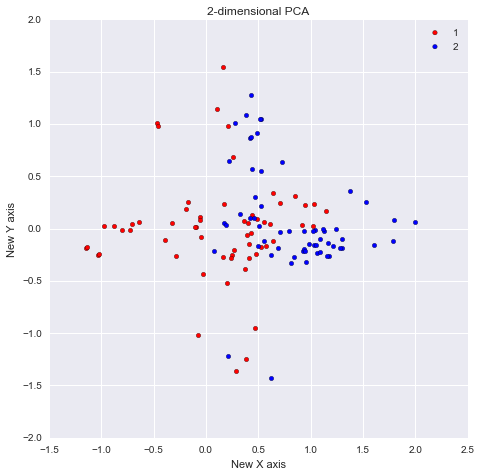

In [10]:
evalue1 = w[0]
evalue2 = w[1]
evector1 = v[:,0] #take this as the x axis
evector2 = v[:,1] #take this as the y axis
#Projection of vector a onto vector b = ((a dot b) / (b dot b))*b

first_newX = []
first_newY = []
second_newX = []
second_newY = []
for i in range(20):
    first_newX.append([])
    first_newY.append([])
    second_newX.append([])
    second_newY.append([])
    first_newX[i] = np.dot((np.divide(np.dot(first[i], evector1), np.dot(evector1, evector1))),evector1)
    first_newY[i] = np.dot((np.divide(np.dot(first[i], evector2), np.dot(evector2, evector2))),evector2)
    second_newX[i] = np.dot((np.divide(np.dot(second[i], evector1), np.dot(evector1, evector1))),evector1)
    second_newY[i] = np.dot((np.divide(np.dot(second[i], evector2), np.dot(evector2, evector2))),evector2)

# plt.scatter(first_newX, first_newY, c="r")
# plt.scatter(second_newX, second_newY, c="b")
# plt.xlabel("New X axis")
# plt.ylabel("New Y axis")

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(first_newX, first_newY, c="r", label="1")
ax.scatter(second_newX, second_newY, c="b", label="2")
ax.legend(loc="upper right")
ax.set_xlabel("New X axis")
ax.set_ylabel("New Y axis")
ax.set_title("2-dimensional PCA")
plt.show()

Yes, PCA makes it much easier to distinguish between the two sets of data. After PCA, we can easily see that the second (blue) dataset is, as a whole, found to the right of the first (red) dataset.

# Question 3 - Low Rank Approximation of Mona Lisa

## Part 1

Load the Mona Lisa image (in grayscale) and treat it as a matrix M. Perform a singular value
decomposition on this matrix using linalg.svd. You can perform a low-rank approximation
by zeroing out singular values and keeping only the top k. Show the best rank k = 2, k = 5
and k = 10 approximation to Mona Lisa.


(603, 400)


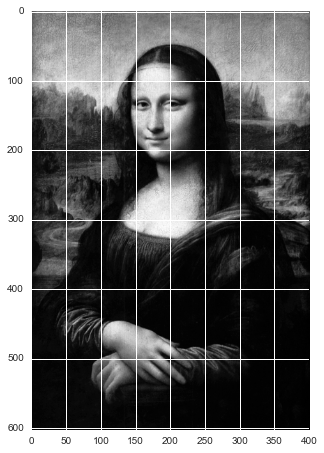

In [11]:
from scipy.misc import imread
monaLisa = imread("mona_lisa.png", flatten = True)
plt.imshow(monaLisa, cmap="Greys_r")
print(monaLisa.shape)

In [12]:
u, s, v = np.linalg.svd(monaLisa)
print("Shape of u: ", u.shape)
print("Shape of s: ", s.shape)
print("Shape of v: ", v.shape)

Shape of u:  (603, 603)
Shape of s:  (400,)
Shape of v:  (400, 400)


## Rank 2 Approximation

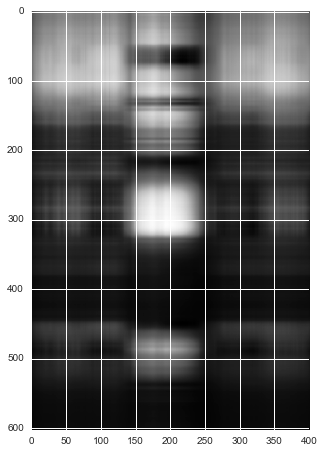

In [13]:
s_2 = np.copy(s)
s_2[2:] = 0

newS = np.zeros(monaLisa.shape)
newS[:400, :400] = np.diag(s_2)
rank2 = np.matmul(np.matmul(u, newS), v)
plt.imshow(rank2, cmap = "Greys_r")

## Rank 5 Approximation

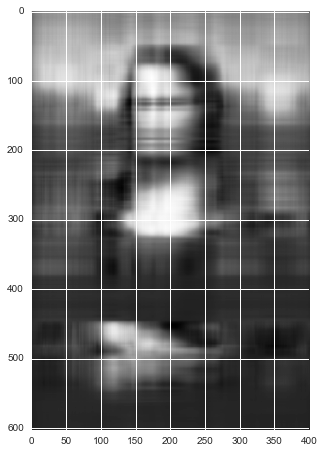

In [14]:
s_5 = np.copy(s)
s_5[5:] = 0

newS = np.zeros(monaLisa.shape)
newS[:400, :400] = np.diag(s_5)
rank5 = np.matmul(np.matmul(u, newS), v)
plt.imshow(rank5, cmap = "Greys_r")

## Rank 10 Approximation

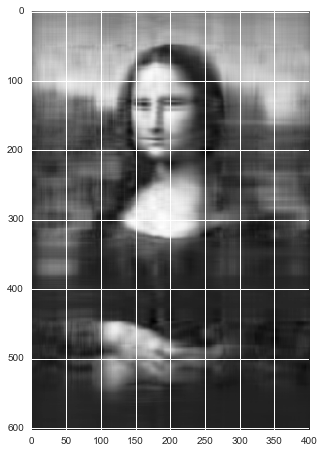

In [15]:
s_10 = np.copy(s)
s_10[10:] = 0

newS = np.zeros(monaLisa.shape)
newS[:400, :400] = np.diag(s_10)
rank10 = np.matmul(np.matmul(u, newS), v)
plt.imshow(rank10, cmap = "Greys_r")

If each pixel is represented by two bytes, how many bits is your compressed Mona Lisa for
each of those k rank approximations?

Rank 2 Approximation: 603 x 400 x (2/400) x 16 bits.

Rank 5 Approximation: 603 x 400 x (5/400) x 16 bits.

Rank 10 Approximation: 603 x 400 x (10/400) x 16 bits

# Question 4

In [16]:
#credit: https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

In [17]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data Preprocessing (From Kaggle)

In [19]:
rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.head()

,log(price + 1),price
0,12.247699,208500
1,12.109016,181500
2,12.317171,223500
3,11.849405,140000
4,12.429220,250000


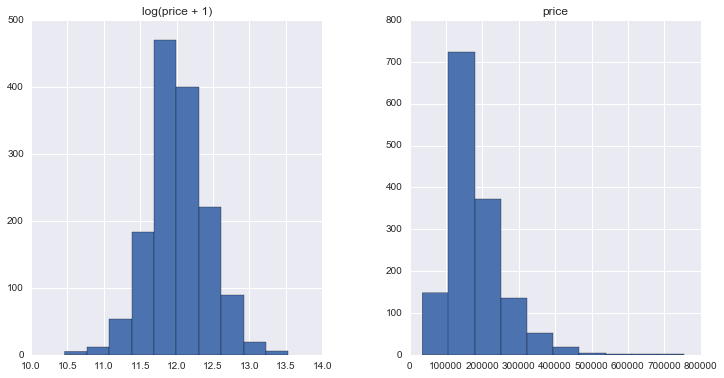

In [20]:
prices.hist()
plt.show()

In [21]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [22]:
all_data = pd.get_dummies(all_data)
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [24]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [26]:
from sklearn.linear_model import Ridge, Lasso
model = Ridge(alpha=0.1).fit(X_train, y)
predict = np.expm1(model.predict(X_test))
print(predict)

[ 121519.48656871  159637.89835116  187900.72801905 ...,  176763.91404077
  121610.54954924  219174.15546004]


In [27]:
submission =  pd.DataFrame({"id":test.Id, "SalePrice":predict})
submission.shape

(1459, 2)

In [28]:
submission.to_csv('submission1.csv', index= False)

RMSE: 0.13029

In [32]:
from sklearn.linear_model import Lasso
model2 = Lasso(alpha=1).fit(X_train, y)
predict2 = np.expm1(model2.predict(X_test))
print(predict2)

[ 192436.14850788  128315.83123379  185502.01773781 ...,  185037.12138312
  114952.29833062  212362.26813547]


In [33]:
submission =  pd.DataFrame({"id":test.Id, "SalePrice":predict2})
submission.shape
submission.to_csv('submission1.csv', index= False)

Lasso got a worse RMSE than the original ridge model (.22043)

In [34]:
from sklearn.linear_model import BayesianRidge
model3 = BayesianRidge().fit(X_train, y)
predict3 = np.expm1(model3.predict(X_test))
print(predict3)

[ 119190.77333142  153846.68214495  182621.20626639 ...,  172166.37010919
  117692.66184543  221780.35476841]


In [35]:
submission =  pd.DataFrame({"id":test.Id, "SalePrice":predict3})
submission.shape
submission.to_csv('submission1.csv', index= False)

Bayesian Ridge got RMSE of .12296

In [36]:
model4 = BayesianRidge(lambda_1 = .001, lambda_2 = .001 ).fit(X_train, y)
predict4 = np.expm1(model4.predict(X_test))
print(predict4)

submission =  pd.DataFrame({"id":test.Id, "SalePrice":predict4})
submission.shape
submission.to_csv('submission1.csv', index= False)

[ 119197.45665041  153856.36339465  182651.82621446 ...,  172180.61952572
  117701.70883229  221735.00177436]


We changed the lambdas and got RMSE of .12298 Therefore, out best RMSE was our original BayesianRidge model with a RMSE of .12296